## Create Some Word Clouds from the Names of the Job Bulletins

Simple data visualization from the file names with a little cleaning

#### Utility Functions

In [97]:
def has_numbers(inputString):
    "string has numbers in it"
    return any(char.isdigit() for char in inputString)

def remove_random_words(jd_str):
    _jd_str = jd_str.lower()

    remove_strs = ['final draft', 'revised', 'rev', 'updated']
    
    for rm_str in remove_strs:
        _jd_str = _jd_str.replace(rm_str, '')
    
    # remove excess white space
    _jd_str = _jd_str.strip()
    _jd_str = _jd_str.replace('  ', ' ')
    return _jd_str



## Extract the File Names and Clean It Up

In [101]:
from pathlib import Path

job_dir = Path('/home/nathan/Projects/kaggle/la-jobs/raw_data/CityofLA/Job Bulletins/')

all_jds = list(job_dir.glob("*"))

In [102]:
all_titles = []

for jd in all_jds:

    file_dir, file_name= str(jd).split("/Job Bulletins/")
    fn_no_txt =  file_name.replace('.txt', '')
    job_tile = ' '.join(w for w in fn_no_txt.split(' ') if not has_numbers(w) )
    
    clean_job_tile = remove_random_words(job_tile)
    all_titles.append(clean_job_tile.title())
    

In [103]:
# Make on big string of the job titles

all_titles_together = ' '.join(w for w in all_titles)


## Make Simple Word Cloud

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 25, 35


<Figure size 1800x2520 with 0 Axes>

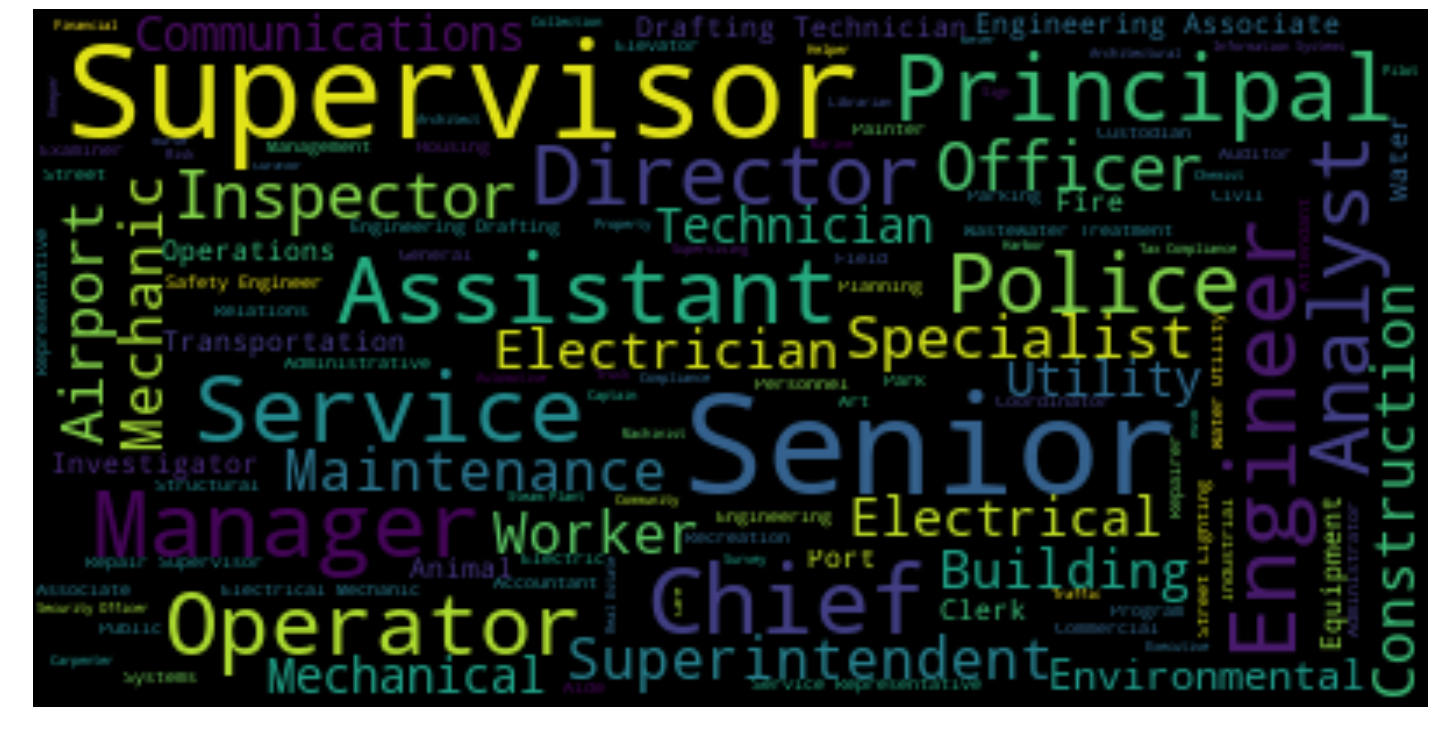

<Figure size 1800x2520 with 0 Axes>

In [110]:
wordcloud = WordCloud(max_font_size=40).generate(all_titles_together)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()

(-0.5, 399.5, 199.5, -0.5)

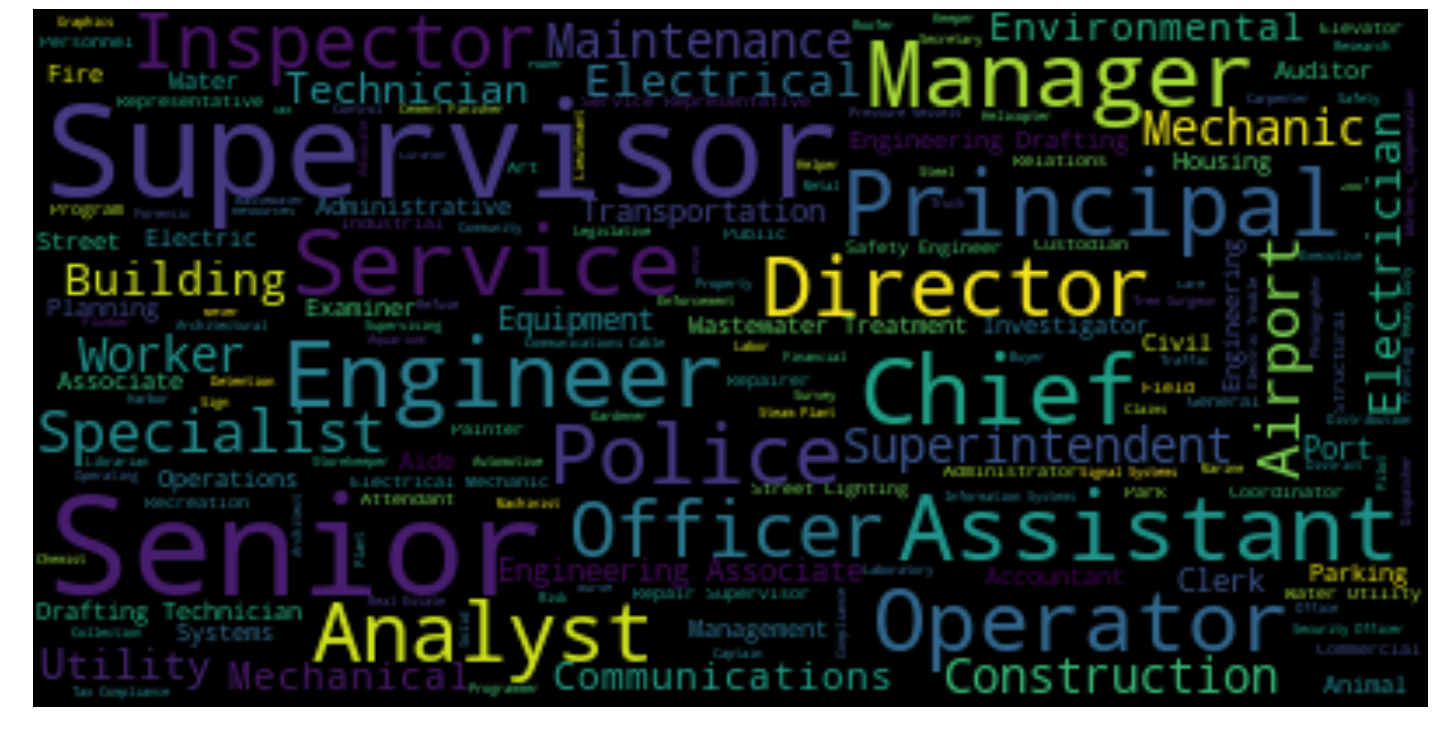

In [107]:
# Make Artsy Word Cloud with LA Sky Line

In [9]:
from PIL import Image
import numpy as np

In [72]:
images_dir = Path('..') / 'images'

# image source
# https://cdn3.vectorstock.com/i/1000x1000/38/57/los-angeles-skyline-vector-20903857.jpg

la_outline_mask = np.array(Image.open(images_dir / 'los_angeles_skyline_cropped.jpg'))

In [81]:
wc = WordCloud(background_color="black", 
               mask=la_outline_mask, 
               max_words=2000, 
               margin=5,
               contour_width=3
              )


wc.generate(all_titles_together)

### Draw Skyline Wordcloud

<Figure size 1800x2520 with 0 Axes>

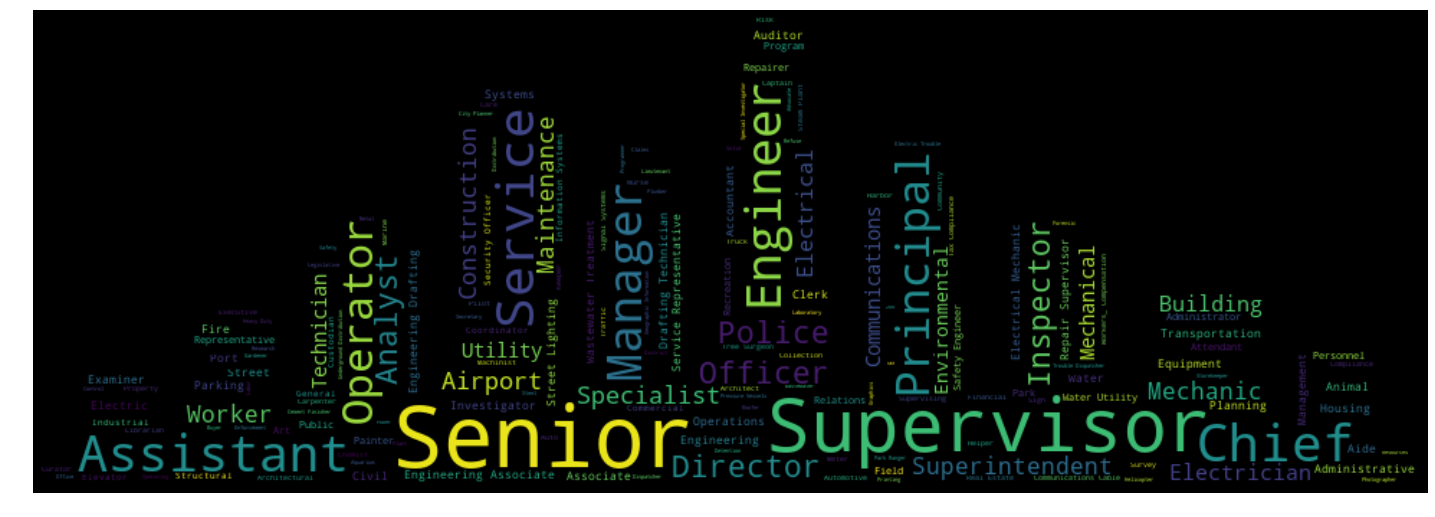

<Figure size 1800x2520 with 0 Axes>

In [109]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
